<a href="https://colab.research.google.com/github/dauuuum/review-analysis/blob/main/review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing modules and data**

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install wordcloud

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터셋 불러오기
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews 3.csv')
df = df.drop(columns = ['Unnamed: 0'])
print(df.shape)
df.head()

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### **EDA**

**칼럼 설명**

|Features|Description|
|--|--|
|Clothing ID|작성한 리뷰에 대한 고유 ID|
|Age|리뷰 작성 고객의 나이|
|Title|리뷰 제목|
|Review Text|리뷰 내용|
|Rating|상품 평가 점수(1~5점)|
|Recommended IND|고객 추천 여부|
|Positive Feedback Count|작성한 리뷰에 대해 다른 고객에게 받은 긍정 피드백 수|
|Division Name|상품의 분류 카테고리명|
|Department Name|상품의 아이템 카테고리명|
|Class Name|상품의 세부 아이템 카테고리명|


In [5]:
# 데이터 정보를 요약하여 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [6]:
# 수치형 변수의 데이터 정보를 요약하여 출력
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
# 결측치 처리
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
df = df[~df['Review Text'].isnull()]
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

### **Title word cloud for EDA**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


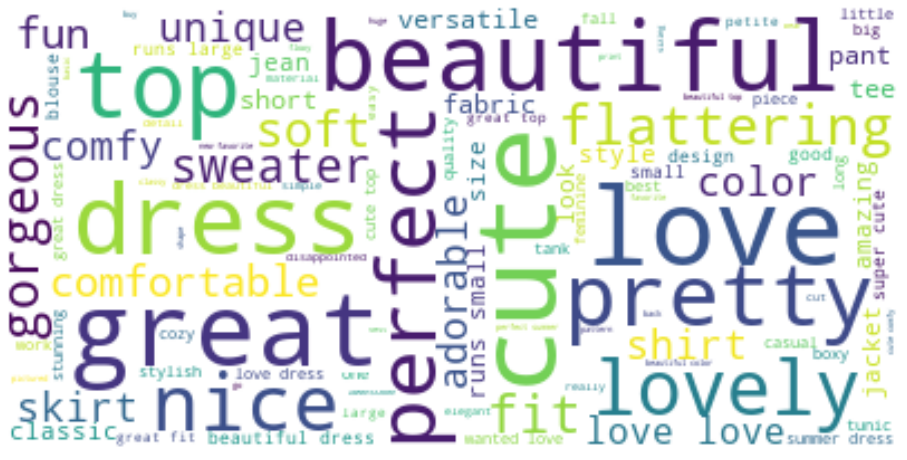

In [9]:
data_title = df[~df['Title'].isnull()]

tokens = re.findall("[\w']+", data_title['Title'].str.lower().str.cat(sep=' ')) 

nltk.download('stopwords')
en_stops = set(stopwords.words('english'))
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

plt.rcParams['figure.figsize'] = (16, 16)

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(filtered_sentence))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### **Finding**
*   top, dress 등 '상품의 아이템 카테고리명'에 대한 긍정 언급이 많습니다.
*   'cute', 'perfect', 'beautiful' 등 긍정어가 많이 언급되었습니다.


### **Review Text word cloud for EDA**

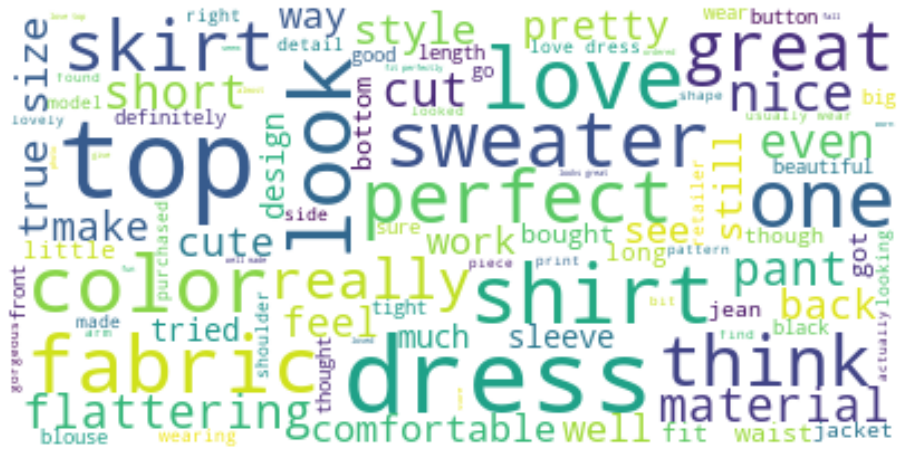

In [10]:
tokens = re.findall("[\w']+", df['Review Text'].str.lower().str.cat(sep=' ')) 

filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

plt.rcParams['figure.figsize'] = (16, 16)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### **Finding**
*   'fabric', 'color', 'thick' 등에 대한 언급이 많습니다.
*   리뷰에서 많이 언급되는 키워드, 상품 정보를 상품의 상세페이지에 적절하게 반영하면 구매 전환율을 높이는 효과가 있을 것으로 예상됩니다.

### **Plot for EDA** 

1    18540
0     4101
Name: Recommended IND, dtype: int64

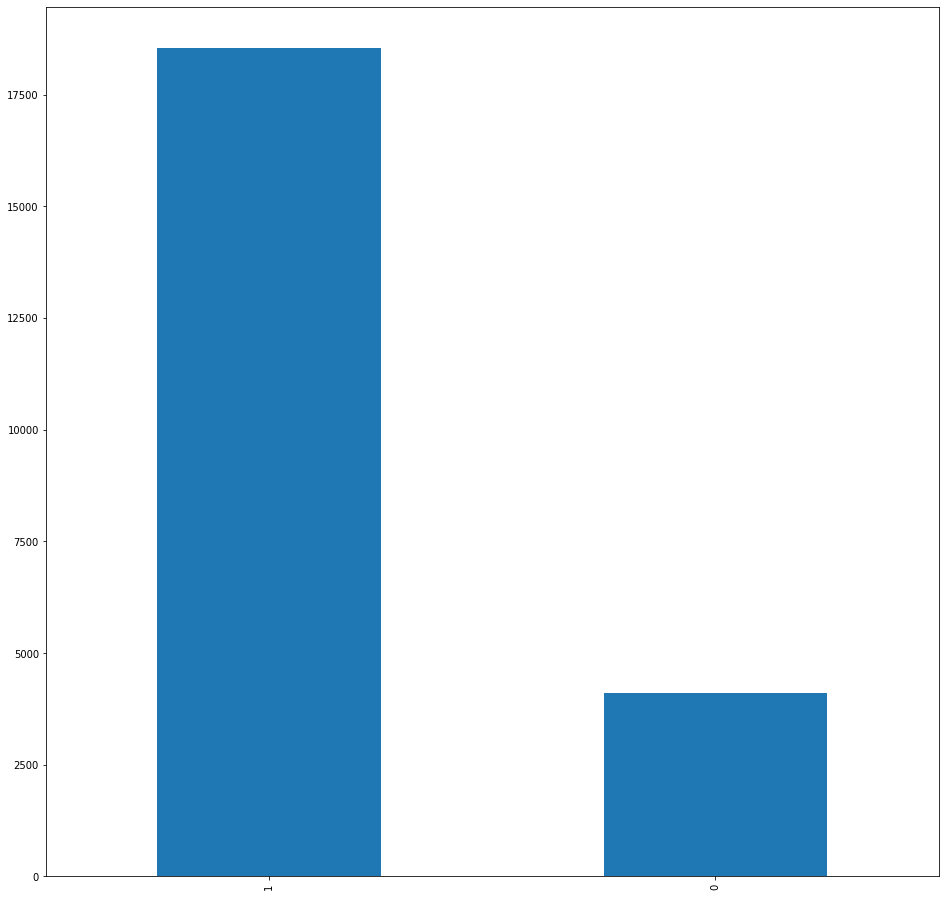

In [11]:
df['Recommended IND'].value_counts().plot(kind='bar')
df['Recommended IND'].value_counts()

### **Data Preprocessing**

In [12]:
# 자연어 전처리
vectorizer = TfidfVectorizer(stop_words = 'english')

### **Modeling**

In [13]:
X = vectorizer.fit_transform(df['Review Text'].str.lower())
X.shape

y = df['Recommended IND']
y = y.to_numpy().ravel()
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '00p',
 '02',
 '03',
 '03dd',
 '04',
 '06',
 '0dd',
 '0in',
 '0p',
 '0petite',
 '0r',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '100lb',
 '100lbs',
 '101',
 '102',
 '102lbs',
 '103',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '106',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108lbs',
 '109',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112lb',
 '112lbs',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115ish',
 '115lb',
 '115lbs',
 '115llbs',
 '116',
 '116bs',
 '116ibs',
 '116lb',
 '116lbs',
 '117',
 '117bl',
 '117lbs',
 '118',
 '118lb',
 '118lbs',
 '119',
 '11and',
 '11in',
 '11inches',
 '12',
 '120',
 '120lb',
 '120lbs',
 '121',
 '122',
 '122lb',
 '122lbs',
 '123',
 '123lb',
 '123lbs',
 '123lbssize',
 '124',
 '124lb',
 '124lbs',
 '125',
 '125b',
 '125ibs',
 '125ish',
 '125lb',
 '125lbs',
 '126',
 '126lbs',

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# DecisionTree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.8048134245970413


In [16]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB-M', MultinomialNB()))
models.append(('NB-B', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

KNN - train_score : 0.885987, test score : 0.831972
NB-M - train_score : 0.836020, test score : 0.814749
NB-B - train_score : 0.907078, test score : 0.866416
RF - train_score : 1.000000, test score : 0.845882
SVM - train_score : 0.821996, test score : 0.806359
XGB - train_score : 0.870141, test score : 0.839921


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


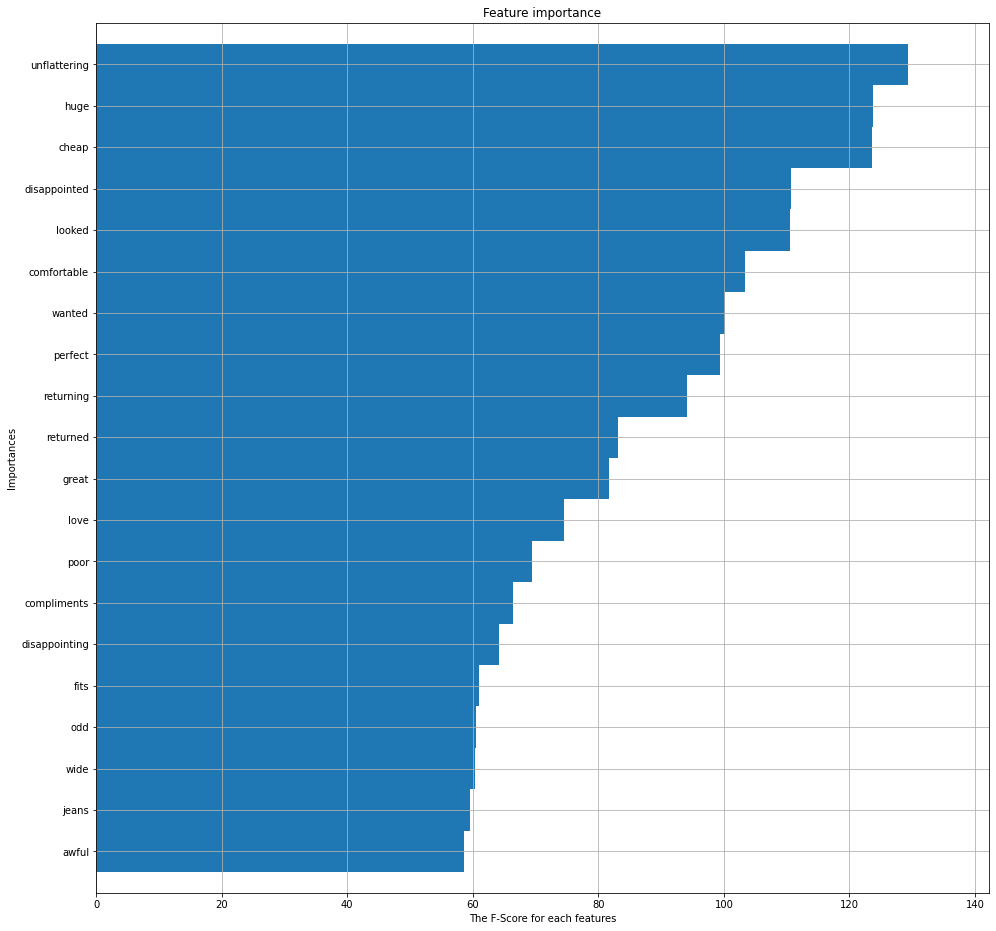

In [17]:
# Feature Importance
max_num_features = 20
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)
ytick = ax.get_yticklabels()
word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

### **평가 및 예측**

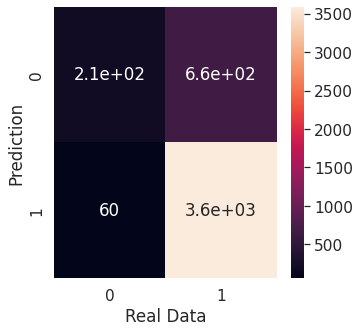

array([[ 212,  665],
       [  60, 3592]])

In [18]:
# Confusion Matrix
model_predition = model.predict(x_test)

cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()
cm

In [19]:
# Precision & Recall
print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.9835706462212487
Precision score: 0.8437867042518206


In [21]:
# 예측 데이터 출력
for i in range(5): 
    
    prediction = model.predict(x_test[i])
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, df['Review Text'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터 문장: 
Absolutely wonderful - silky and sexy and comfortable
0 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1

1 번째 테스트 데이터 문장: 
Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
1 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1

2 번째 테스트 데이터 문장: 
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
2 번째 테스트 데이터의 예측 